# Modulation Classification

Developing AutoML Model for AWGN Channel for Modulation Classification. SNR Ratio's(in dB) of Channel are $[-15,-10,-5,0,5,10,15,20,25,30]$.

**Data Generation:**
Data is generated using MatLab's Communication Toolbox for Modulation Schemes QPSK, 16-QAM, 64-QAM for SNR Ratio's (in dB) $[-15,-10,-5,0,5,10,15,20,25,30]$ when signal is transmitted through Channels AWGN and Rayleigh Channels.

**Modulation Classification:**
We will use AutoML to create a classifer that predicts Modulation Scheme depending on In-Phase and Quadrature-Phase Components at the Receiver's End.

## Imports

### Importing Data

Files are uploaded in Google Drive. Notebook is connected to Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Modulation-Classification/Synthetic-Datasets/AutoML

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Modulation-Classification/Synthetic-Datasets/AutoML


### Importing Libraries

We will be using AutoKeras for generating AutoML Models.
Source of Documentation: [https://autokeras.com/](https://autokeras.com/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sns
import scipy.io
import os
from sklearn.model_selection import train_test_split

# Importing Preprocessing Libraries
from Import_Functions import ImportData, ImportDatasets
from Plot_Results import EvaluateData, PlotResults

# AutoML Libraries
!pip3 install autokeras==1.0.12
!pip3 install tensorflow==2.4
!pip3 install keras-tuner==1.0.2
import autokeras as ak

# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input
from tensorflow.keras.models import Model

## Importing Data

Importing Data for all Models

In [3]:
Data = {}

# For AWGN Channel
## MLP Model
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('AWGN')
Data['AWGN_MLP'] = (X_Train, y_Train, X_Valid, y_Valid)

## CNN/RNN Model
X_train, y_train, X_valid, y_valid = np.copy(X_Train),np.copy(y_Train), X_Valid.copy(), y_Valid.copy()
X_train = X_train.reshape(-1,100,2)
y_train = y_train[::100]
for snr in [-15,-10,-5,0,5,10,15,20,25,30]:
    X_valid[snr] = X_valid[snr].reshape(-1,100,2)
    y_valid[snr] = y_valid[snr][::100]
Data['AWGN_CNN'] = (X_train, y_train, X_valid, y_valid)

# For Rayleigh Channel, L=2
Data['Rayleigh_L=2'] = ImportDatasets('Rayleigh', L=2)

# For Rayleigh Channel, L=3
Data['Rayleigh_L=3'] = ImportDatasets('Rayleigh', L=3)

## Customised AutoML Blocks

In [4]:
class AddLastDimsLayerBlock(ak.Block):
    def build(self, hp, inputs=None):
        input_node = inputs[0]
        output_node = tf.expand_dims(input_node,axis=-1)
        return output_node

## AutoML MLP Model for AWGN Channel

For AWGN Channel, Input Dimensions is $(2,)$

### Importing Data and Creating Classifier

Importing Data

In [5]:
X_Train, y_Train, X_Valid, y_Valid = Data['AWGN_MLP']

Creating a Classifier

In [6]:
AWGNClassifier = ak.StructuredDataClassifier(
                    overwrite=True,
                    max_trials=3,
                    tuner='greedy',
                    loss='categorical_crossentropy',
                    num_classes=3,
                    project_name="MLP/AWGN")

AWGNClassifier.fit(X_Train, y_Train, epochs=15, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 00m 42s]
val_accuracy: 0.9130489826202393

Best val_accuracy So Far: 0.9130489826202393
Total elapsed time: 00h 02m 05s
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 3.1911 - accuracy: 0.5288
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 1.3360 - accuracy: 0.5608
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 1.2825 - accuracy: 0.5578
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 1.2366 - accuracy: 0.5761
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 1.2019 - accuracy: 0.5688
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 1.1714 - accuracy: 0.5670
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 1.1473 - accuracy: 0.5711
Epoch 8/15
938/938 [==============================] - 3s 3ms/step - loss: 1.1239 - accuracy: 0.5778
Epoch 9/15
938/938 [

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                96        
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              33792     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0     

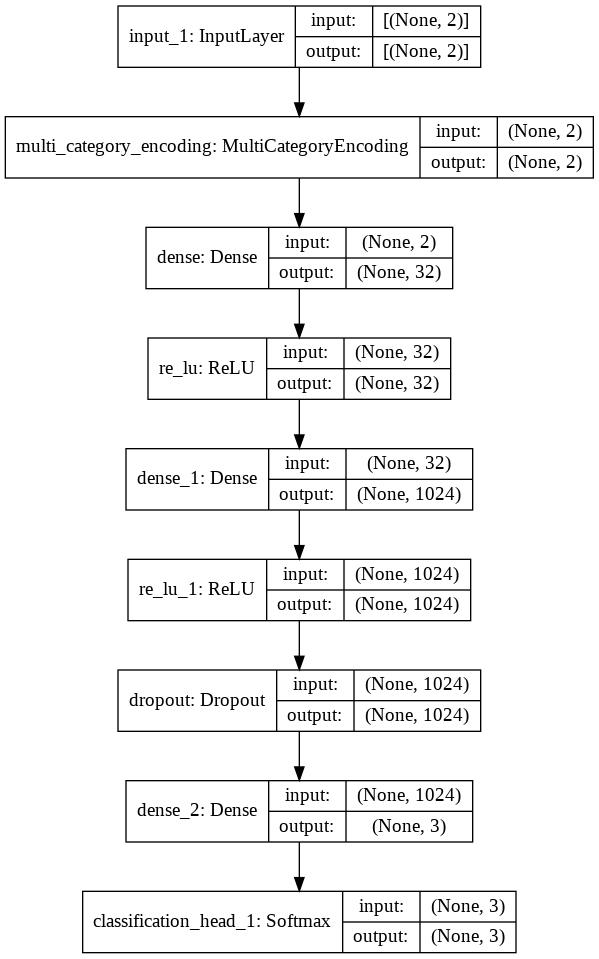

In [7]:
AWGN_Model = AWGNClassifier.export_model()
AWGN_Model.summary()
tf.keras.utils.plot_model(AWGN_Model, to_file='../Models/AWGN_Model_MLP.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [8]:
AWGN_Model.fit(X_Train, y_Train, epochs=100, batch_size=512, validation_split=0.1,shuffle=True)

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 0.7736 - accuracy: 0.6714 - val_loss: 0.5404 - val_accuracy: 0.7952
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7350 - accuracy: 0.6831 - val_loss: 0.5338 - val_accuracy: 0.7909
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7310 - accuracy: 0.6843 - val_loss: 0.5424 - val_accuracy: 0.7919
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7277 - accuracy: 0.6870 - val_loss: 0.5103 - val_accuracy: 0.8098
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.7248 - accuracy: 0.6898 - val_loss: 0.5170 - val_accuracy: 0.8162
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7220 - accuracy: 0.6910 - val_loss: 0.4918 - val_accuracy: 0.8214
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7196 - accuracy: 0.6934 - val_loss: 0.5005 - val_accuracy: 0.8218

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3803333342075348
SNR: -10 Accuracy: 0.47083333134651184
SNR: -5 Accuracy: 0.609000027179718
SNR: 0 Accuracy: 0.6915000081062317
SNR: 5 Accuracy: 0.7540000081062317
SNR: 10 Accuracy: 0.8193333148956299
SNR: 15 Accuracy: 0.8516666889190674
SNR: 20 Accuracy: 0.8653333187103271
SNR: 25 Accuracy: 0.8743333220481873
SNR: 30 Accuracy: 0.8898333311080933


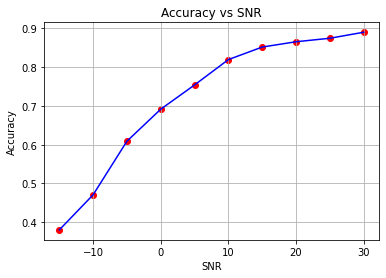

In [9]:
EvaluateData(AWGN_Model, X_Valid, y_Valid, "../Results/AWGN_Accuracy_MLP.png")

Save Model

In [10]:
AWGN_Model.save("../Models/AWGN_MLP.h5")

## AutoML CNN Model for AWGN Channel

For AWGN Channel, Input Dimensions is $(100,2)$

### Importing Data and Creating Classifier

Importing Data

In [11]:
X_Train, y_Train, X_Valid, y_Valid = Data['AWGN_CNN']

Creating a Classifier

In [12]:
input_node = ak.Input()
addDims_node = AddLastDimsLayerBlock()(input_node)
conv_node = ak.ConvBlock()(addDims_node)
dense_node = ak.DenseBlock()(conv_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

AWGNClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=3,
                                project_name="CNN_Model/AWGN")

AWGNClassifier.fit(X_Train, y_Train, epochs=15, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 00m 04s]
val_loss: 0.7178525924682617

Best val_loss So Far: 0.574908435344696
Total elapsed time: 00h 00m 27s
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
10/10 [==============================] - 1s 17ms/step - loss: 1.1049 - accuracy: 0.5356
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 1.0015 - accuracy: 0.4165
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 1.3858 - accuracy: 0.4655
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 0.9572 - accuracy: 0.6800
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 0.9194 - accuracy: 0.5091
Epoch 6/15
10/10 [==============================] - 0s 8ms/step - loss: 0.9293 - accuracy: 0.5084
Epoch 7/15
10/10 [==============================] - 0s 8ms/step - loss: 0.8830 - accuracy: 0.6118
Epoch 8/15
10/10 [==============================] - 0s 8ms/step - loss: 0.8641 - accuracy: 0.5662
Epoch 9/15
10/10 [==========================

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
tf.expand_dims (TFOpLambda)  (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 1, 32)         9248  

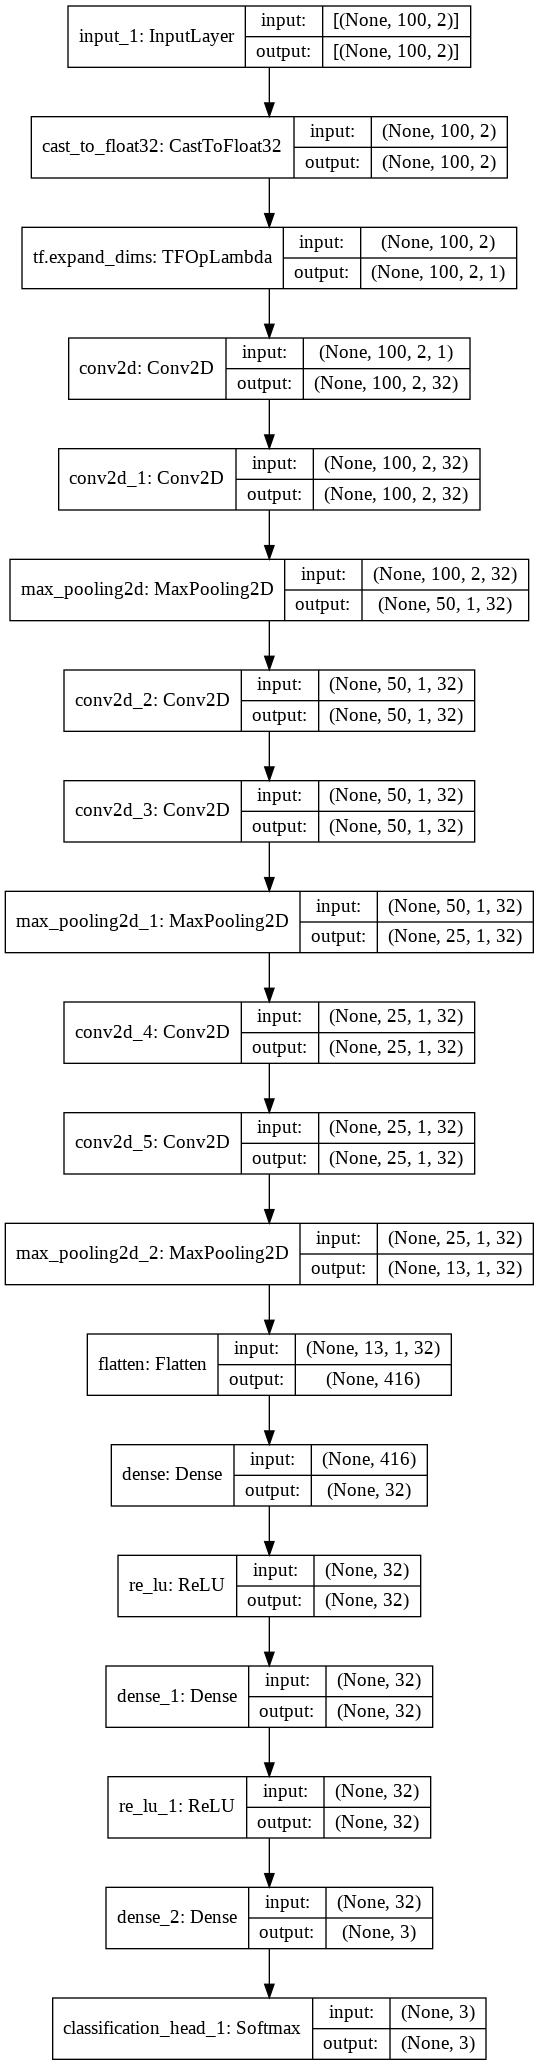

In [13]:
AWGN_Model = AWGNClassifier.export_model()
AWGN_Model.summary()
tf.keras.utils.plot_model(AWGN_Model, to_file='../Models/AWGN_Model_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model



In [14]:
AWGN_Model.fit(X_Train, y_Train, epochs=40, batch_size=256, validation_split=0.1,shuffle=True)

Epoch 1/40
9/9 [==============================] - 1s 55ms/step - loss: 0.6093 - accuracy: 0.7671 - val_loss: 0.4172 - val_accuracy: 0.6667
Epoch 2/40
9/9 [==============================] - 0s 10ms/step - loss: 0.5533 - accuracy: 0.7194 - val_loss: 0.3940 - val_accuracy: 0.9917
Epoch 3/40
9/9 [==============================] - 0s 10ms/step - loss: 0.5375 - accuracy: 0.8153 - val_loss: 0.3417 - val_accuracy: 0.9917
Epoch 4/40
9/9 [==============================] - 0s 10ms/step - loss: 0.5034 - accuracy: 0.8157 - val_loss: 0.3130 - val_accuracy: 1.0000
Epoch 5/40
9/9 [==============================] - 0s 9ms/step - loss: 0.4889 - accuracy: 0.8185 - val_loss: 0.2931 - val_accuracy: 0.9958
Epoch 6/40
9/9 [==============================] - 0s 12ms/step - loss: 0.4758 - accuracy: 0.8213 - val_loss: 0.2682 - val_accuracy: 1.0000
Epoch 7/40
9/9 [==============================] - 0s 10ms/step - loss: 0.4674 - accuracy: 0.8185 - val_loss: 0.2723 - val_accuracy: 1.0000
Epoch 8/40
9/9 [============

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3333333432674408
SNR: -10 Accuracy: 0.46666666865348816
SNR: -5 Accuracy: 0.8999999761581421
SNR: 0 Accuracy: 1.0
SNR: 5 Accuracy: 1.0
SNR: 10 Accuracy: 0.9833333492279053
SNR: 15 Accuracy: 0.9833333492279053
SNR: 20 Accuracy: 0.9833333492279053
SNR: 25 Accuracy: 0.9333333373069763
SNR: 30 Accuracy: 0.9666666388511658


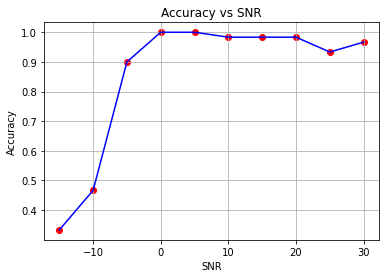

In [15]:
EvaluateData(AWGN_Model, X_Valid, y_Valid, "../Results/AWGN_Accuracy_CNN.png")

Save Model

In [16]:
AWGN_Model.save("../Models/AWGN_CNN.h5")

## AutoML CNN Model for Rayleigh Channel of Channel-Length = 2

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [27]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=2']

Creating Classifier


In [28]:
input_node = ak.Input()
addDims_node = AddLastDimsLayerBlock()(input_node)
conv_node = ak.ConvBlock()(addDims_node)
dense_node = ak.DenseBlock()(conv_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RayleighClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=3,
                                project_name="CNN_Model/Rayleigh_L=2")

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 00m 14s]
val_loss: 0.0397803969681263

Best val_loss So Far: 0.004620642401278019
Total elapsed time: 00h 00m 44s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 3.0157 - accuracy: 0.3968
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 1.0361 - accuracy: 0.5161
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 1.6804 - accuracy: 0.3113
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 1.2330 - accuracy: 0.6140
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.7814 - accuracy: 0.8115
INFO:tensorflow:Assets written to: ./CNN_Model/Rayleigh_L=2/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
tf.expand_dims (TFOpLambda)  (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 1, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 1, 32)         0     

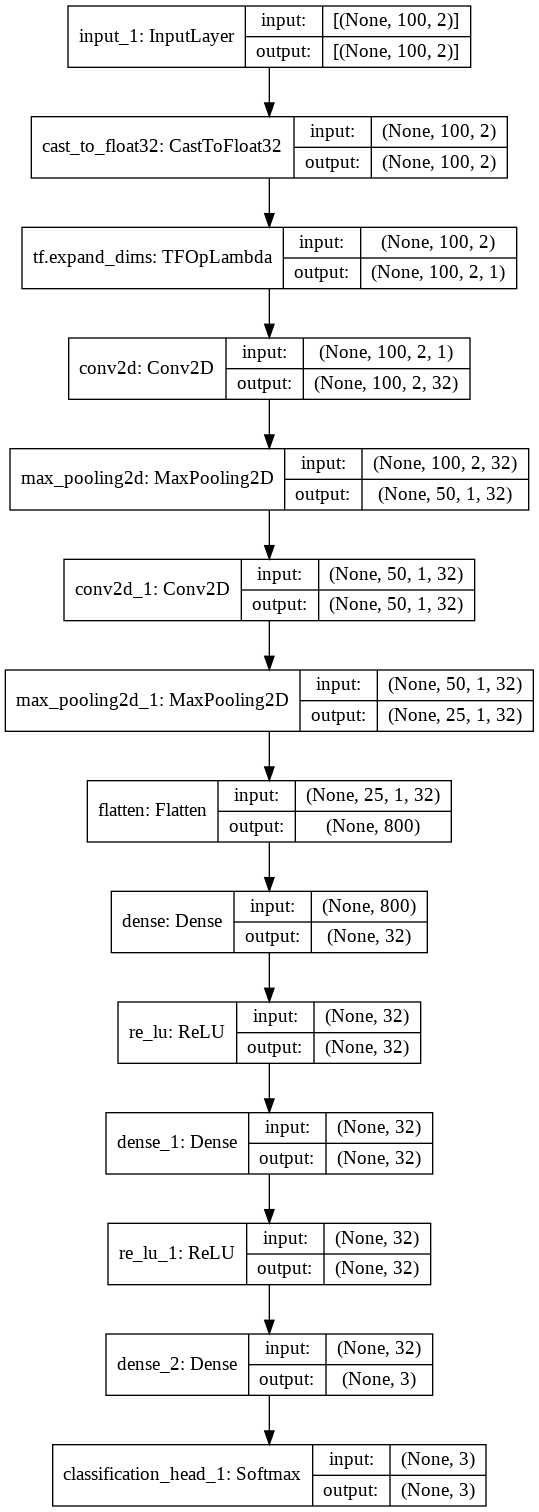

In [29]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=2_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [30]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 0.1995 - accuracy: 0.9333 - val_loss: 0.0074 - val_accuracy: 0.9985
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9592 - val_loss: 0.0089 - val_accuracy: 0.9974
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.9645 - val_loss: 0.0130 - val_accuracy: 0.9959
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9709 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9757 - val_loss: 4.4398e-04 - val_accuracy: 0.9999
Epoch 6/25
375/375 [==============================] - 1s 4ms/step - loss: 0.0481 - accuracy: 0.9817 - val_loss: 3.1552e-04 - val_accuracy: 0.9999
Epoch 7/25
375/375 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.9844 - val_loss: 8.2307e-05 - val_accuracy: 1

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.968999981880188
SNR: -10 Accuracy: 0.965666651725769
SNR: -5 Accuracy: 0.9886666536331177
SNR: 0 Accuracy: 0.9800000190734863
SNR: 5 Accuracy: 0.9983333349227905
SNR: 10 Accuracy: 1.0
SNR: 15 Accuracy: 1.0
SNR: 20 Accuracy: 1.0
SNR: 25 Accuracy: 1.0
SNR: 30 Accuracy: 1.0


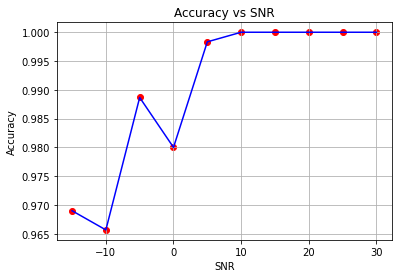

In [31]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=2_CNN.png")

Save Model

In [32]:
Rayleigh_Model.save("../Models/Rayleigh_L=2_CNN.h5")

## AutoML CNN Model for Rayleigh Channel of Channel-Length = 3

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [33]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=3']

Creating Classifier


In [34]:
input_node = ak.Input()
addDims_node = AddLastDimsLayerBlock()(input_node)
conv_node = ak.ConvBlock()(addDims_node)
dense_node = ak.DenseBlock()(conv_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RayleighClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=3,
                                project_name="CNN_Model/Rayleigh_L=3")

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 00m 17s]
val_loss: 0.6083682775497437

Best val_loss So Far: 0.6083682775497437
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 1.2058 - accuracy: 0.2197
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 1.1564 - accuracy: 0.2960
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 1.2032 - accuracy: 0.3589
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 4.7562 - accuracy: 0.5961
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 10.1595 - accuracy: 0.5279
INFO:tensorflow:Assets written to: ./CNN_Model/Rayleigh_L=3/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
tf.expand_dims (TFOpLambda)  (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 1, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 1, 32)         9248  

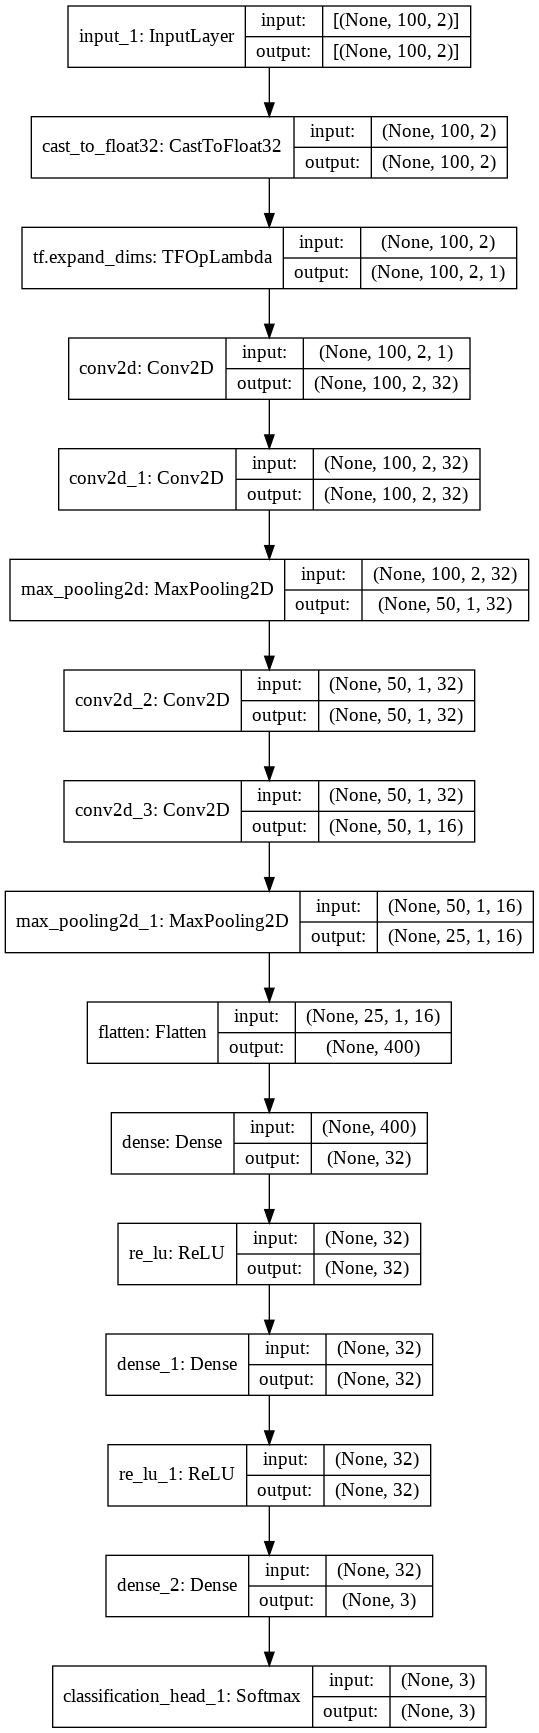

In [35]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=3_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [36]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 3s 6ms/step - loss: 0.8352 - accuracy: 0.7481 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.3339 - accuracy: 0.8342 - val_loss: 0.0190 - val_accuracy: 0.9967
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.2566 - accuracy: 0.8703 - val_loss: 0.0106 - val_accuracy: 0.9982
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.2267 - accuracy: 0.8892 - val_loss: 0.0063 - val_accuracy: 0.9987
Epoch 5/25
375/375 [==============================] - 2s 6ms/step - loss: 0.2064 - accuracy: 0.9031 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 6/25
375/375 [==============================] - 2s 5ms/step - loss: 0.1898 - accuracy: 0.9138 - val_loss: 0.0058 - val_accuracy: 0.9987
Epoch 7/25
375/375 [==============================] - 2s 5ms/step - loss: 0.1829 - accuracy: 0.9194 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.8506666421890259
SNR: -10 Accuracy: 0.8693333268165588
SNR: -5 Accuracy: 0.7103333473205566
SNR: 0 Accuracy: 0.9196666479110718
SNR: 5 Accuracy: 0.972000002861023
SNR: 10 Accuracy: 0.9919999837875366
SNR: 15 Accuracy: 0.9959999918937683
SNR: 20 Accuracy: 0.9973333477973938
SNR: 25 Accuracy: 0.9986666440963745
SNR: 30 Accuracy: 0.999666690826416


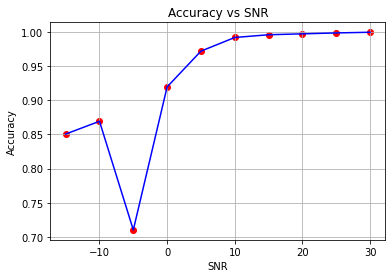

In [37]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=3_CNN.png")

Save Model

In [38]:
Rayleigh_Model.save("../Models/Rayleigh_L=3_CNN.h5")

## AutoML RNN Model for Rayleigh Channel of Channel-Length = 2

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [47]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=2']

Creating Classifier


In [48]:
input_node = ak.Input()
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=True,
                       layer_type='lstm')(input_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RayleighClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node, 
                                overwrite=True,
                                tuner='greedy',
                                max_trials=3,
                                project_name="RNN_Model/Rayleigh_L=2")

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 01m 02s]
val_loss: 0.00736416969448328

Best val_loss So Far: 0.007006114814430475
Total elapsed time: 00h 03m 19s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/5
469/469 [==============================] - 16s 24ms/step - loss: 1.1482 - accuracy: 0.3740
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.8745 - accuracy: 0.6111
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.7528 - accuracy: 0.7286
Epoch 4/5
469/469 [==============================] - 11s 24ms/step - loss: 0.7575 - accuracy: 0.7594
Epoch 5/5
469/469 [==============================] - 11s 23ms/step - loss: 0.7767 - accuracy: 0.7628


INFO:tensorflow:Assets written to: ./RNN_Model/Rayleigh_L=2/best_model/assets


INFO:tensorflow:Assets written to: ./RNN_Model/Rayleigh_L=2/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 4)            80        
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 4)            112       
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12832     
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0     

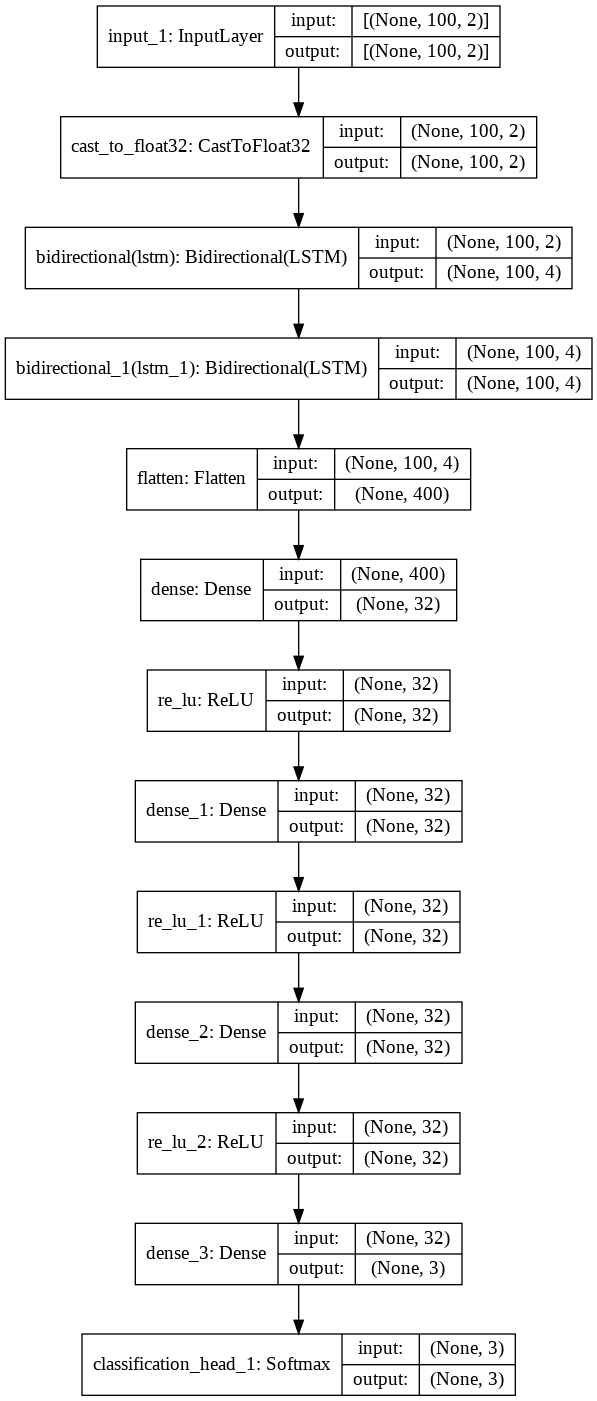

In [49]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=2_RNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [50]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 15s 29ms/step - loss: 0.3274 - accuracy: 0.8777 - val_loss: 0.0738 - val_accuracy: 0.9973
Epoch 2/25
375/375 [==============================] - 9s 25ms/step - loss: 0.2389 - accuracy: 0.8963 - val_loss: 0.0458 - val_accuracy: 0.9977
Epoch 3/25
375/375 [==============================] - 10s 26ms/step - loss: 0.2041 - accuracy: 0.9079 - val_loss: 0.0350 - val_accuracy: 0.9966
Epoch 4/25
375/375 [==============================] - 9s 25ms/step - loss: 0.1833 - accuracy: 0.9175 - val_loss: 0.0624 - val_accuracy: 0.9820
Epoch 5/25
375/375 [==============================] - 9s 25ms/step - loss: 0.1676 - accuracy: 0.9252 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 6/25
375/375 [==============================] - 9s 25ms/step - loss: 0.1509 - accuracy: 0.9330 - val_loss: 0.0398 - val_accuracy: 0.9865
Epoch 7/25
375/375 [==============================] - 10s 26ms/step - loss: 0.1394 - accuracy: 0.9398 - val_loss: 0.0369 - val_accuracy: 0.9

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.9150000214576721
SNR: -10 Accuracy: 0.934333324432373
SNR: -5 Accuracy: 0.9786666631698608
SNR: 0 Accuracy: 0.9676666855812073
SNR: 5 Accuracy: 0.9863333106040955
SNR: 10 Accuracy: 0.9926666617393494
SNR: 15 Accuracy: 0.9950000047683716
SNR: 20 Accuracy: 0.9936666488647461
SNR: 25 Accuracy: 0.9959999918937683
SNR: 30 Accuracy: 0.9946666955947876


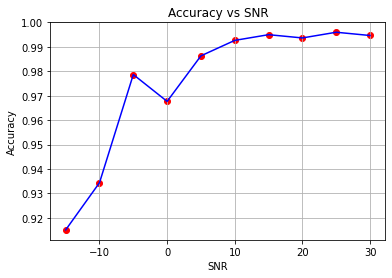

In [51]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=2_RNN.png")

Save Model

In [52]:
Rayleigh_Model.save("../Models/Rayleigh_L=2_RNN.h5")

## AutoML RNN Model for Rayleigh Channel of Channel-Length = 3

For Rayleigh Channel, Input Dimensions is (100,2)

### Importing Data and Creating Classifier

Importing Data

In [57]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=3']

Creating Classifier


In [58]:
input_node = ak.Input()
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=True,
                       layer_type='lstm')(input_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RayleighClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node, 
                                overwrite=True,
                                tuner='greedy',
                                max_trials=3,
                                project_name="RNN_Model/Rayleigh_L=3")

RayleighClassifier.fit(X_Train, y_Train, epochs=5, batch_size=256, validation_split=0.1)

Trial 3 Complete [00h 00m 35s]
val_loss: 0.2986599802970886

Best val_loss So Far: 0.2986599802970886
Total elapsed time: 00h 02m 41s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/5
469/469 [==============================] - 8s 13ms/step - loss: 1.2954 - accuracy: 0.3516
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 1.2958 - accuracy: 0.3880
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 1.1019 - accuracy: 0.4910
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.9780 - accuracy: 0.4842
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.9667 - accuracy: 0.4736


INFO:tensorflow:Assets written to: ./RNN_Model/Rayleigh_L=3/best_model/assets


INFO:tensorflow:Assets written to: ./RNN_Model/Rayleigh_L=3/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 100, 2)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 4)            80        
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12832     
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99    

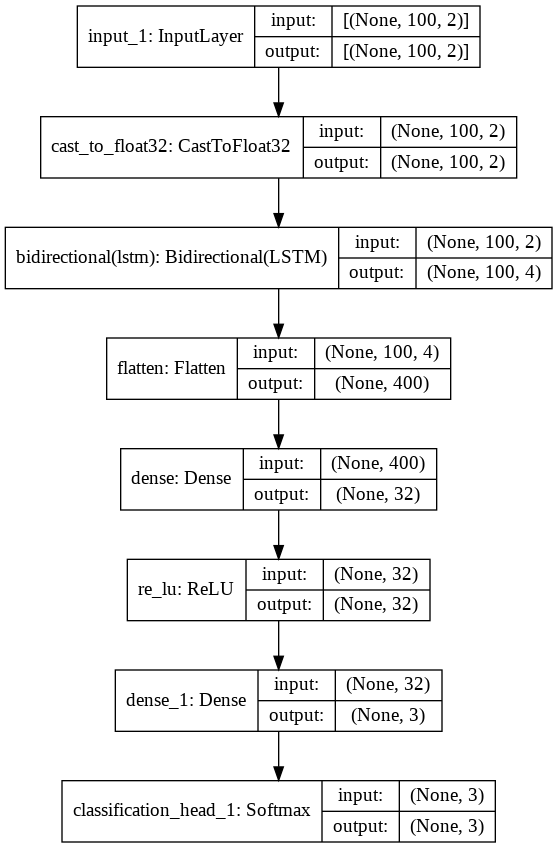

In [59]:
Rayleigh_Model = RayleighClassifier.export_model()
Rayleigh_Model.summary()
tf.keras.utils.plot_model(Rayleigh_Model, to_file='../Models/Rayleigh_Model_L=3_RNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [60]:
Rayleigh_Model.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 8s 14ms/step - loss: 0.6231 - accuracy: 0.7030 - val_loss: 0.2687 - val_accuracy: 0.9062
Epoch 2/25
375/375 [==============================] - 5s 13ms/step - loss: 0.5391 - accuracy: 0.7316 - val_loss: 0.2590 - val_accuracy: 0.8926
Epoch 3/25
375/375 [==============================] - 5s 13ms/step - loss: 0.5047 - accuracy: 0.7429 - val_loss: 0.2040 - val_accuracy: 0.9186
Epoch 4/25
375/375 [==============================] - 5s 13ms/step - loss: 0.4866 - accuracy: 0.7508 - val_loss: 0.2017 - val_accuracy: 0.9202
Epoch 5/25
375/375 [==============================] - 5s 12ms/step - loss: 0.4728 - accuracy: 0.7579 - val_loss: 0.1761 - val_accuracy: 0.9341
Epoch 6/25
375/375 [==============================] - 5s 13ms/step - loss: 0.4587 - accuracy: 0.7651 - val_loss: 0.2178 - val_accuracy: 0.9153
Epoch 7/25
375/375 [==============================] - 5s 13ms/step - loss: 0.4473 - accuracy: 0.7716 - val_loss: 0.1845 - val_accuracy: 0.9281

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.6443333625793457
SNR: -10 Accuracy: 0.6240000128746033
SNR: -5 Accuracy: 0.6029999852180481
SNR: 0 Accuracy: 0.6240000128746033
SNR: 5 Accuracy: 0.8486666679382324
SNR: 10 Accuracy: 0.9436666369438171
SNR: 15 Accuracy: 0.9693333506584167
SNR: 20 Accuracy: 0.9683333039283752
SNR: 25 Accuracy: 0.9706666469573975
SNR: 30 Accuracy: 0.9733333587646484


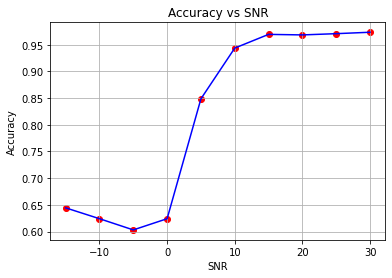

In [61]:
EvaluateData(Rayleigh_Model, X_Valid, y_Valid, "../Results/Rayleigh_Accuracy_L=3_RNN.png")

Save Model

In [62]:
Rayleigh_Model.save("../Models/Rayleigh_L=3_RNN.h5")

## CNN Model for Rayleigh Data

This part of the code is written to verify the results with CNN.

### Creating a Model

In [63]:
def CreateCNNModel():
    tf.keras.backend.clear_session()
    In = Input(shape=(100,2))
    x = tf.keras.layers.Reshape((100,2,1))(In)
    x = Conv2D(filters=64,kernel_size=(3,1),activation='relu')(x)
    x = Conv2D(filters=16,kernel_size=(3,2),activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    Ou = Dense(3,activation='softmax')(x)

    model = Model(In,Ou)
    model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["acc"])

    return model

### Rayleigh Fading of Channel Length = 2

Importing Data

In [64]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=2']

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 2, 64)         256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 1, 16)         6160      
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387   

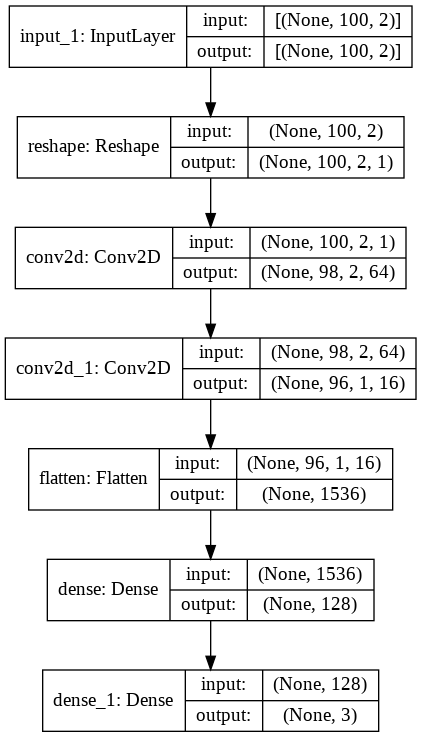

In [65]:
CNNModel = CreateCNNModel()
CNNModel.summary()
tf.keras.utils.plot_model(CNNModel, to_file='../Models/CNN2_Rayleigh_Model_L=2.png', show_shapes=True,show_layer_names=True)

Training the Model

In [66]:
CNNModel.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 2s 5ms/step - loss: 0.5432 - acc: 0.7273 - val_loss: 0.0365 - val_acc: 0.9906
Epoch 2/25
375/375 [==============================] - 2s 4ms/step - loss: 0.1242 - acc: 0.9507 - val_loss: 0.0140 - val_acc: 0.9962
Epoch 3/25
375/375 [==============================] - 2s 4ms/step - loss: 0.0931 - acc: 0.9599 - val_loss: 0.0053 - val_acc: 0.9988
Epoch 4/25
375/375 [==============================] - 2s 4ms/step - loss: 0.0821 - acc: 0.9651 - val_loss: 0.0029 - val_acc: 0.9996
Epoch 5/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0591 - acc: 0.9768 - val_loss: 0.0023 - val_acc: 0.9995
Epoch 6/25
375/375 [==============================] - 2s 4ms/step - loss: 0.0435 - acc: 0.9839 - val_loss: 0.0011 - val_acc: 0.9997
Epoch 7/25
375/375 [==============================] - 2s 4ms/step - loss: 0.0291 - acc: 0.9899 - val_loss: 0.0023 - val_acc: 0.9992
Epoch 8/25
375/375 [==============================] - 2s 4ms/step - loss: 0.

Evaluating the Model

Evaluating Model
SNR: -15 Accuracy: 0.8106666803359985
SNR: -10 Accuracy: 0.9366666674613953
SNR: -5 Accuracy: 0.9419999718666077
SNR: 0 Accuracy: 0.9786666631698608
SNR: 5 Accuracy: 0.9976666569709778
SNR: 10 Accuracy: 0.9993333220481873
SNR: 15 Accuracy: 0.9993333220481873
SNR: 20 Accuracy: 0.999666690826416
SNR: 25 Accuracy: 1.0
SNR: 30 Accuracy: 1.0


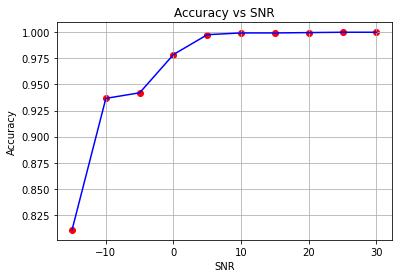

In [67]:
EvaluateData(CNNModel, X_Valid, y_Valid, "../Results/CNN2_Rayleigh_Accuracy_L=2.png")

Save Model

In [68]:
CNNModel.save("../Models/CNN2_Rayleigh_L=2.h5")

### Rayleigh Fading of Channel Length = 3

Importing Data

In [69]:
X_Train, y_Train, X_Valid, y_Valid = Data['Rayleigh_L=3']

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 2)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 100, 2, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 2, 64)         256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 1, 16)         6160      
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387   

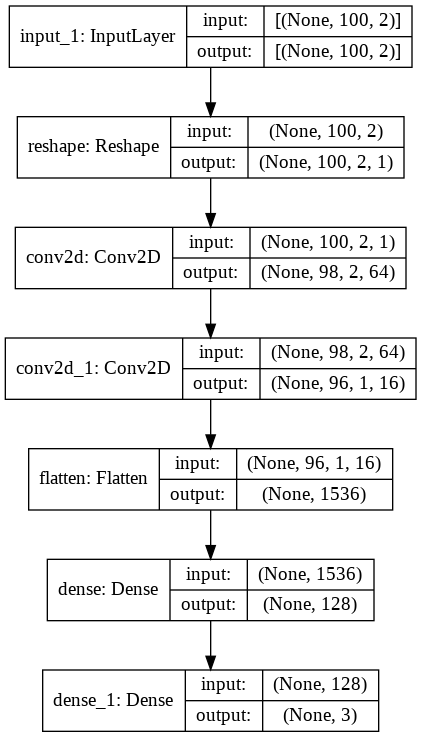

In [70]:
CNNModel = CreateCNNModel()
CNNModel.summary()
tf.keras.utils.plot_model(CNNModel, to_file='../Models/CNN2_Rayleigh_Model_L=3.png', show_shapes=True,show_layer_names=True)

Training the Model

In [71]:
CNNModel.fit(X_Train, y_Train, epochs=25, batch_size=256, validation_split=0.2,shuffle=True)

Epoch 1/25
375/375 [==============================] - 2s 5ms/step - loss: 0.8311 - acc: 0.5729 - val_loss: 0.1921 - val_acc: 0.9858
Epoch 2/25
375/375 [==============================] - 2s 4ms/step - loss: 0.3797 - acc: 0.8269 - val_loss: 0.0398 - val_acc: 0.9898
Epoch 3/25
375/375 [==============================] - 2s 5ms/step - loss: 0.3033 - acc: 0.8494 - val_loss: 0.0157 - val_acc: 0.9976
Epoch 4/25
375/375 [==============================] - 2s 5ms/step - loss: 0.2701 - acc: 0.8651 - val_loss: 0.0151 - val_acc: 0.9955
Epoch 5/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2416 - acc: 0.8816 - val_loss: 0.0106 - val_acc: 0.9975
Epoch 6/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2106 - acc: 0.8986 - val_loss: 0.0105 - val_acc: 0.9967
Epoch 7/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2053 - acc: 0.9006 - val_loss: 0.0184 - val_acc: 0.9941
Epoch 8/25
375/375 [==============================] - 2s 4ms/step - loss: 0.

Evaluating the Model

Evaluating Model
SNR: -15 Accuracy: 0.7493333220481873
SNR: -10 Accuracy: 0.8119999766349792
SNR: -5 Accuracy: 0.7853333353996277
SNR: 0 Accuracy: 0.9143333435058594
SNR: 5 Accuracy: 0.9660000205039978
SNR: 10 Accuracy: 0.9853333234786987
SNR: 15 Accuracy: 0.9936666488647461
SNR: 20 Accuracy: 0.9946666955947876
SNR: 25 Accuracy: 0.996999979019165
SNR: 30 Accuracy: 0.9983333349227905


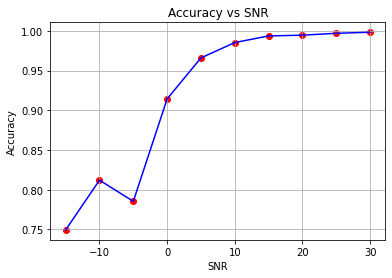

In [72]:
EvaluateData(CNNModel, X_Valid, y_Valid, "../Results/CNN2_Rayleigh_Accuracy_L=3.png")

Save Model

In [73]:
CNNModel.save("../Models/CNN2_Rayleigh_L=3.h5")

## Plot Results
Plotting Results of AutoML Models

### AWGN Models

Importing Data and Models

In [74]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('AWGN')

AWGN_MLP = tf.keras.models.load_model("../Models/AWGN_MLP.h5")
AWGN_CNN = tf.keras.models.load_model("../Models/AWGN_CNN.h5")

Plotting Results

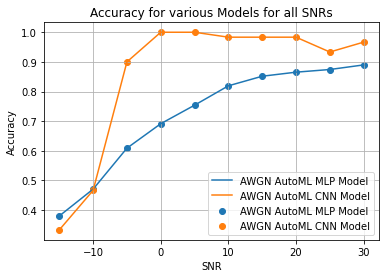

In [75]:
Models = {"AWGN AutoML MLP Model":AWGN_MLP, "AWGN AutoML CNN Model":AWGN_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/AWGN_Accuracies.png")

### Rayleigh Models for L = 2


In [76]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=2)

Rayeligh_AutoMLCNN = tf.keras.models.load_model("../Models/Rayleigh_L=2_CNN.h5")
Rayeligh_AutoMLRNN = tf.keras.models.load_model("../Models/Rayleigh_L=2_RNN.h5")
Rayeligh_CNN = tf.keras.models.load_model("../Models/CNN2_Rayleigh_L=2.h5")

Plotting Results

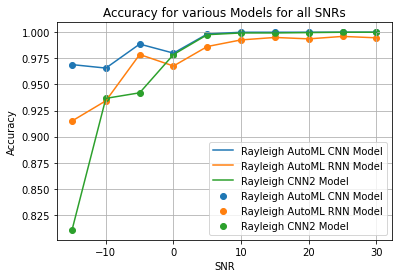

In [77]:
Models = {"Rayleigh AutoML CNN Model":Rayeligh_AutoMLCNN, "Rayleigh AutoML RNN Model":Rayeligh_AutoMLRNN, "Rayleigh CNN2 Model":Rayeligh_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/Rayleigh_L=2_Accuracies.png")

### Rayleigh Models for L = 3


In [78]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rayleigh',L=3)

Rayeligh_AutoMLCNN = tf.keras.models.load_model("../Models/Rayleigh_L=3_CNN.h5")
Rayeligh_AutoMLRNN = tf.keras.models.load_model("../Models/Rayleigh_L=3_RNN.h5")
Rayeligh_CNN = tf.keras.models.load_model("../Models/CNN2_Rayleigh_L=3.h5")

Plotting Results

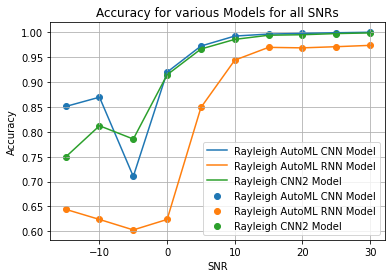

In [79]:
Models = {"Rayleigh AutoML CNN Model":Rayeligh_AutoMLCNN, "Rayleigh AutoML RNN Model":Rayeligh_AutoMLRNN, "Rayleigh CNN2 Model":Rayeligh_CNN}
PlotResults(Models, X_Valid, y_Valid, "../Results/Rayleigh_L=3_Accuracies.png")